In [0]:
# Importamos las bibliotecas que necesitamos.
import os
import numpy as np
import pandas as pd

# Revisamos la carpeta donde estan nuestros datasets.
os.listdir('/content/')


['.config', 'rating.csv', 'anime.csv', 'sample_data']

In [0]:
# Obtenemos los datos del dataset anime.
anime = pd.read_csv('/content/anime.csv')
# Revisamos las primeras 10 filas del dataset de animes.
anime.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [0]:
# Obtenemos los datos del dataset rating.
usuarios = pd.read_csv('/content/rating.csv')
# Revisamos las primeras 10 filas del dataset de usuarios.
usuarios.head(10)

,user_id,anime_id,rating
0,1,20,-1.0
1,1,24,-1.0
2,1,79,-1.0
3,1,226,-1.0
4,1,241,-1.0
5,1,355,-1.0
6,1,356,-1.0
7,1,442,-1.0
8,1,487,-1.0
9,1,846,-1.0


In [0]:
# Promedio de calificacion por usuario (solo los primeros 10 usuarios son mostrados)
media_calif = usuarios.groupby(['user_id']).mean().reset_index()
media_calif['prom_rating'] = media_calif['rating']
media_calif.drop(['anime_id','rating'],axis=1, inplace=True)
media_calif.head(10)

,user_id,prom_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383
5,6,-1.000000
6,7,7.387755
7,8,8.333333
8,9,8.000000
9,10,2.875000


In [0]:
# Agrupamos el promedio de rating con la tabla usuarios, que contiene informacion
# que nos interesa.
usuarios = pd.merge(usuarios,media_calif, on=['user_id','user_id'])
usuarios.head(10)

,user_id,anime_id,rating,prom_rating
0,1,20,-1.0,-0.712418
1,1,24,-1.0,-0.712418
2,1,79,-1.0,-0.712418
3,1,226,-1.0,-0.712418
4,1,241,-1.0,-0.712418
5,1,355,-1.0,-0.712418
6,1,356,-1.0,-0.712418
7,1,442,-1.0,-0.712418
8,1,487,-1.0,-0.712418
9,1,846,-1.0,-0.712418


In [0]:
# Como ejemplo del resultado de la operacion anterior, tomamos al primer usuario, 
# que tiene un promedio de rating negativo, entonces, al quitar todas las celdas
# con promedio menor a la media, estamos limpiando la tabla de informacion que 
# no nos intersa.
usuarios = usuarios.drop(usuarios[usuarios.rating < usuarios.prom_rating].index)
usuarios[usuarios['user_id']==1].head(10)

,user_id,anime_id,rating,prom_rating
47,1,8074,10.0,-0.712418
81,1,11617,10.0,-0.712418
83,1,11757,10.0,-0.712418
101,1,15451,10.0,-0.712418


In [0]:
# Renombramos la columna de rating en usuario para poder diferenciar entre el rating
# que pone el usuario y el rating del anime.
usuarios = usuarios.rename({'rating':'rating_usuario'},axis='columns')

In [0]:
# Mezclamos los datasets
all_data = pd.merge(anime,usuarios, on=['anime_id','anime_id'])
all_data.head(10)

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_usuario,prom_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10.0,-0.832298
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8.0,7.374593
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10.0,8.062500
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10.0,8.112360
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10.0,8.388889
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10.0,8.680328


In [0]:
# Utilizamos a lo mas 20,000 usuarios, para utilizar menos tiempo para
# procesar.
all_data = all_data[all_data.user_id <= 20000]

In [0]:
usuarios_anime = pd.crosstab(all_data['user_id'], all_data['name'])

In [0]:
usuarios_anime.shape

(20000, 7852)

In [0]:
# PCA (PRINCIPAL COMPONENT ANALYSIS)
from sklearn import decomposition
# Total de componentes con las que nos vamos a quedar
pca_anime = decomposition.PCA(n_components=3)
# Ajustamos el modelo con nuestro dataset y se aplica una reduccion
# de dimension al mismo. 
pca_samples = pca_anime.fit_transform(usuarios_anime)

In [0]:
# A partir de un ndarray creamos un DataFrame y lo mostramos, 
# para asi ver el resultado de la transformacion.
cluster = pd.DataFrame(pca_samples)
cluster.head()

,0,1,2
0,-1.579129,-0.500241,0.415763
1,-1.773553,-0.272593,0.116389
2,0.218814,-1.232282,-0.985833
3,0.199435,-0.291005,0.681026
4,3.532125,-0.184793,-0.743288


In [0]:
# Importamos las bibliotecas necesarias para representar la informacion en el
# plano
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (2, 3)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['figure.figsize'] = (15, 8)

In [0]:
# K-MEANS 
from sklearn.cluster import KMeans

# A partir del conjunto original se van a crear otros n clusters, los cuales seran
# agrupados dados los n centroides que KMeans calcula
clusterer = KMeans(n_clusters=6,random_state=30).fit(cluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(cluster)

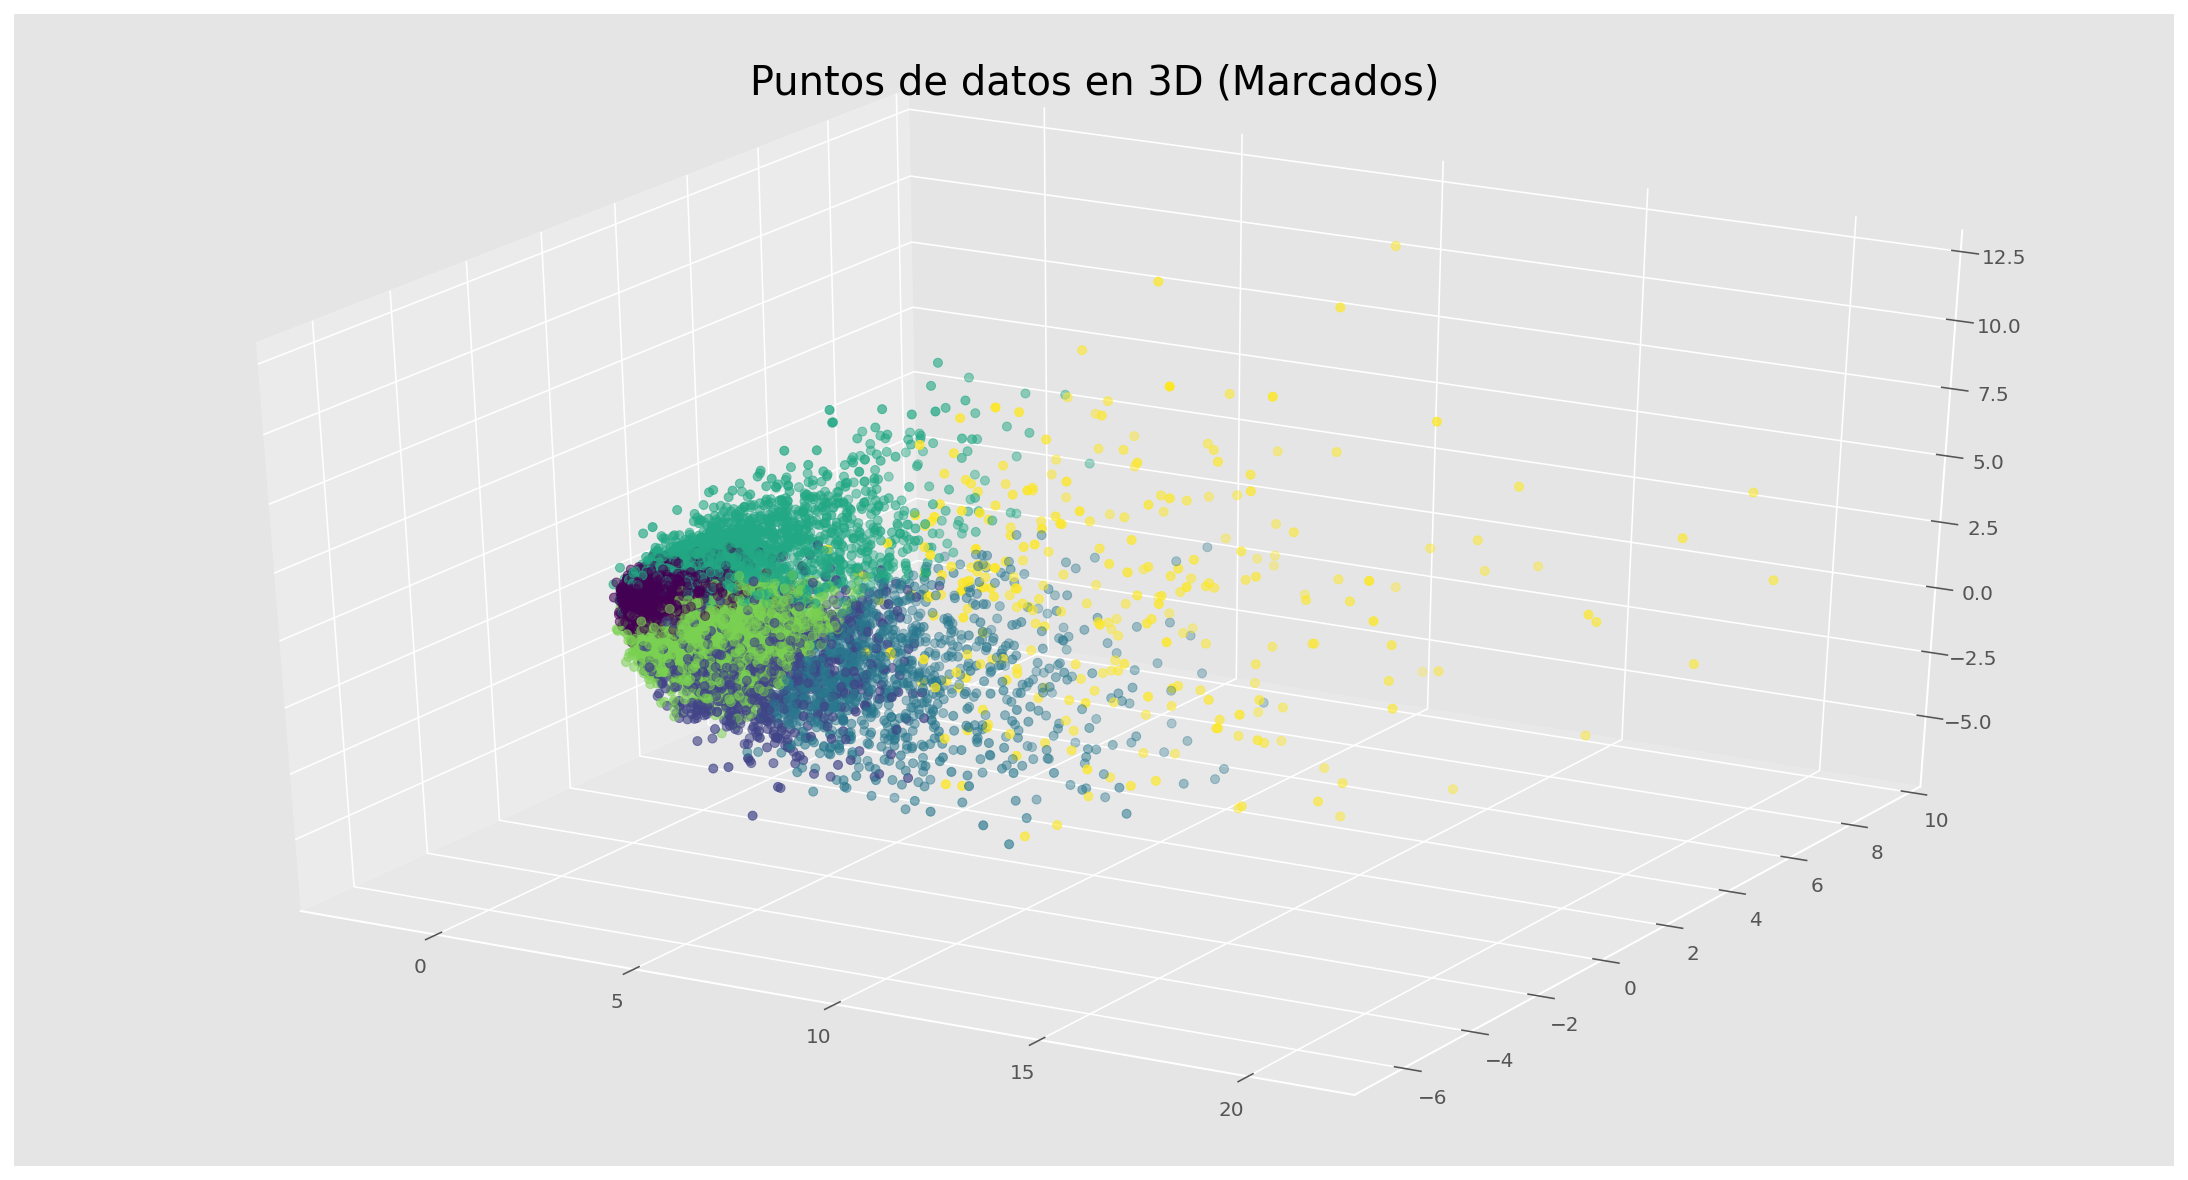

In [0]:
# Graficamos los n clusters en el plano.
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(cluster[0], cluster[2], cluster[1], c = c_preds)
plt.title('Puntos de datos en 3D (Marcados)', fontsize=20)

plt.show()

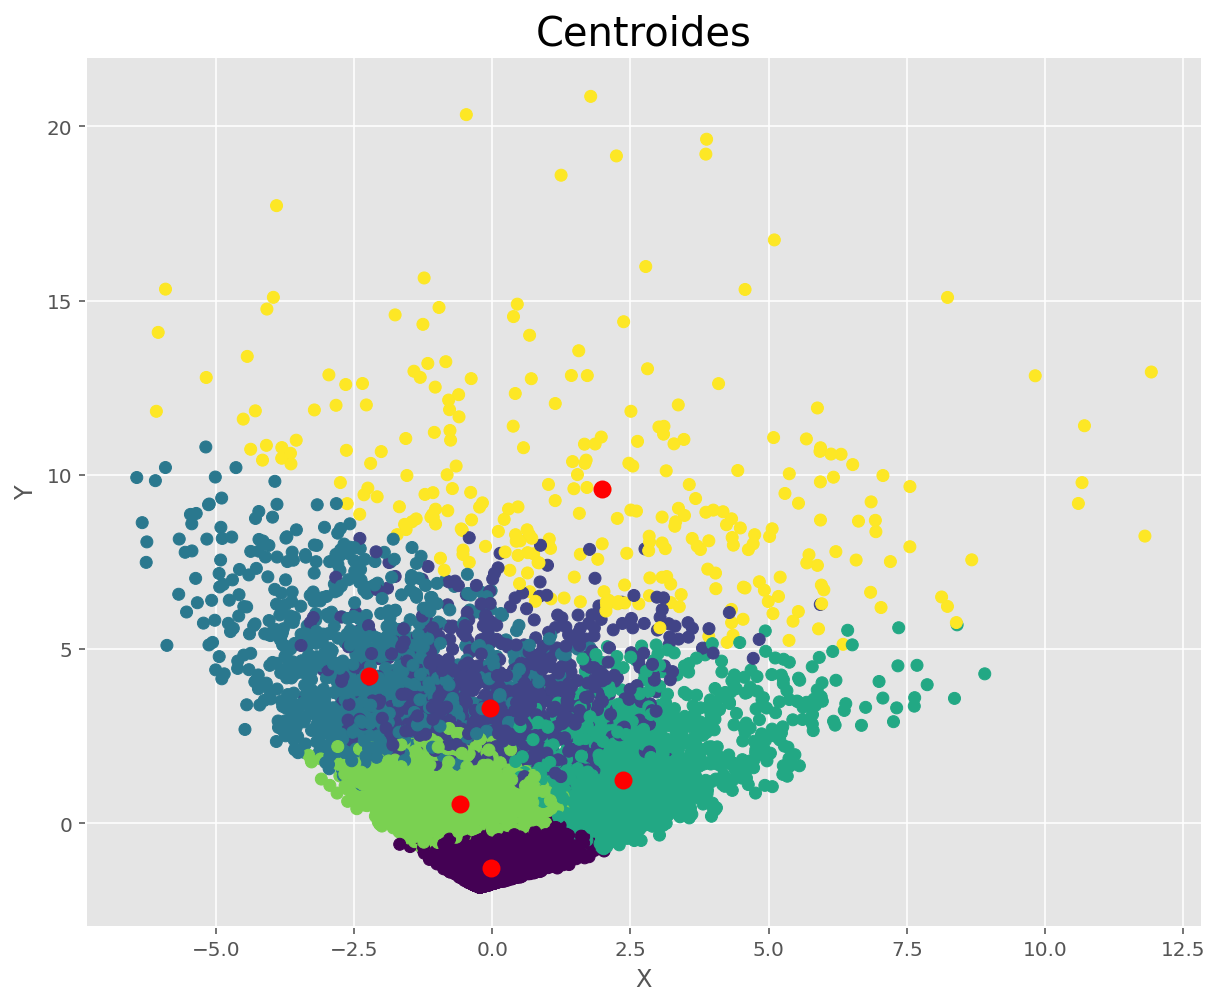

In [0]:
# Ahora veamos los centroides que quedaron al final
fig = plt.figure(figsize=(10,8))
plt.scatter(cluster[1],cluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Centroides', fontsize=20)
plt.show()

In [0]:
usuarios_anime['cluster'] = c_preds
usuarios_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//Tasogare no Udewa Densetsu: Offline de Aimashou,.hack//The Movie: Sekai no Mukou ni,.hack//Unison,.hack//Versus: The Thanatos Report,009 Re:Cyborg,009-1,009-1: R&amp;B,00:08,07-Ghost,1+2=Paradise,100%,100-man-nen Chikyuu no Tabi: Bander Book,1000-nen Joou: Queen Millennia,1001 Nights,11-nin Iru!,11eyes,11eyes Picture Drama,11eyes: Momoiro Genmutan,12-sai.,12-sai. 2nd Season,12-sai.: Chicchana Mune no Tokimeki,15 Bishoujo Hyouryuuki,1989,20-dai no Heya-hen,2005-nen Uchuu no Tabi,...,Zoids Fuzors,Zoids Genesis,Zoids Shinseiki/Zero,Zoku Koihime,Zoku Natsume Yuujinchou,Zoku Natsume Yuujinchou: 3D Nyanko-sensei Gekijou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zombie-Loan Specials,"Zone of the Enders: Dolores, I",Zone of the Enders: Idolo,Zonmi-chan: Halloween☆Special Movie!,Zonmi-chan: Meat Pie of the Dead,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,_Summer,_Summer Specials,eX-Driver,eX-Driver the Movie,eX-Driver the Movie Specials,eX-Driver: Nina &amp; Rei Danger Zone,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,fake!fake!,gdgd Fairies,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
c0 = usuarios_anime[usuarios_anime['cluster']==0].drop('cluster',axis=1).mean()

In [0]:
c0.sort_values(ascending=False)[0:15]

name
Death Note                            0.283700
Shingeki no Kyojin                    0.176506
Sword Art Online                      0.153911
Sen to Chihiro no Kamikakushi         0.143039
Code Geass: Hangyaku no Lelouch       0.141850
Fullmetal Alchemist: Brotherhood      0.140151
Fullmetal Alchemist                   0.138198
Naruto                                0.129788
Ouran Koukou Host Club                0.124607
Elfen Lied                            0.123333
Code Geass: Hangyaku no Lelouch R2    0.119511
Angel Beats!                          0.112885
Howl no Ugoku Shiro                   0.103202
Dragon Ball Z                         0.091650
Mononoke Hime                         0.088932
dtype: float64

In [0]:
c1 = usuarios_anime[usuarios_anime['cluster']==1].drop('cluster',axis=1).mean()

In [0]:
c1.sort_values(ascending=False)[0:15]

name
Steins;Gate                                                 0.803681
Shingeki no Kyojin                                          0.785276
Fullmetal Alchemist: Brotherhood                            0.757230
Death Note                                                  0.716915
Code Geass: Hangyaku no Lelouch                             0.694128
Psycho-Pass                                                 0.667835
Code Geass: Hangyaku no Lelouch R2                          0.666959
One Punch Man                                               0.653812
Fate/Zero                                                   0.628396
No Game No Life                                             0.617879
Angel Beats!                                                0.614373
Durarara!!                                                  0.612621
Fate/Zero 2nd Season                                        0.611744
Toradora!                                                   0.588081
Ano Hi Mita Hana no Namae wo 

In [0]:
c2 = usuarios_anime[usuarios_anime['cluster']==2].drop('cluster',axis=1).mean()

In [0]:
c2.sort_values(ascending=False)[0:15]

name
No Game No Life                                        0.808911
Sword Art Online                                       0.798020
Angel Beats!                                           0.760396
Shingeki no Kyojin                                     0.739604
Mirai Nikki (TV)                                       0.676238
Toradora!                                              0.674257
Sakurasou no Pet na Kanojo                             0.653465
Hataraku Maou-sama!                                    0.634653
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.615842
High School DxD                                        0.607921
Guilty Crown                                           0.606931
Boku wa Tomodachi ga Sukunai                           0.602970
Nisekoi                                                0.601980
Death Note                                             0.598020
Noragami                                               0.597030
dtype: float64

In [0]:
c3 = usuarios_anime[usuarios_anime['cluster']==3].drop('cluster',axis=1).mean()

In [0]:
c3.sort_values(ascending=False)[0:15]

name
Death Note                            0.661683
Code Geass: Hangyaku no Lelouch       0.647841
Fullmetal Alchemist                   0.601883
Code Geass: Hangyaku no Lelouch R2    0.583056
Suzumiya Haruhi no Yuuutsu            0.555925
Sen to Chihiro no Kamikakushi         0.545404
Elfen Lied                            0.498893
Cowboy Bebop                          0.494463
Neon Genesis Evangelion               0.492248
Tengen Toppa Gurren Lagann            0.490033
Toradora!                             0.463455
Mononoke Hime                         0.461240
Howl no Ugoku Shiro                   0.454596
Samurai Champloo                      0.450166
Fullmetal Alchemist: Brotherhood      0.440753
dtype: float64

In [0]:
c4 = usuarios_anime[usuarios_anime['cluster']==4].drop('cluster',axis=1).mean()

In [0]:
c4.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.625344
Death Note                                                  0.540947
Sword Art Online                                            0.532432
Angel Beats!                                                0.472827
Fullmetal Alchemist: Brotherhood                            0.447533
No Game No Life                                             0.423742
Steins;Gate                                                 0.417481
Mirai Nikki (TV)                                            0.410719
Code Geass: Hangyaku no Lelouch                             0.408966
Code Geass: Hangyaku no Lelouch R2                          0.373904
Toradora!                                                   0.372903
Tokyo Ghoul                                                 0.329076
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.    0.311545
Ao no Exorcist                                              0.309542
Another                      

In [0]:
c5 = usuarios_anime[usuarios_anime['cluster']==5].drop('cluster',axis=1).mean()

In [0]:
c5.sort_values(ascending=False)[0:15]

name
Code Geass: Hangyaku no Lelouch          0.895307
Toradora!                                0.891697
Angel Beats!                             0.880866
Bakemonogatari                           0.870036
Code Geass: Hangyaku no Lelouch R2       0.859206
Steins;Gate                              0.844765
Tengen Toppa Gurren Lagann               0.833935
Death Note                               0.823105
Clannad                                  0.823105
Suzumiya Haruhi no Yuuutsu               0.819495
Durarara!!                               0.808664
Toaru Majutsu no Index                   0.808664
Fullmetal Alchemist: Brotherhood         0.776173
Darker than Black: Kuro no Keiyakusha    0.772563
Fate/Zero                                0.772563
dtype: float64

In [0]:
def make_genre_list(anime_l):
  """
  Funcion que dada una lista de nombres de anime, se obtiene su genero desde el
  dataset original
  """
  genre_list = list()
  for name in anime['name']:
    if name in anime_l:
      for genre in anime[anime['name']==name].genre.values:
        genre_list.append(genre)
  return genre_list

In [0]:
genre_listc0 = list(c2.sort_values(ascending=False)[0:15].index)
datac0 = pd.DataFrame()
datac0['genre'] = make_genre_list(genre_listc0)
datac0

,genre
0,"Mystery, Police, Psychological, Supernatural, ..."
1,"Action, Drama, Fantasy, Shounen, Super Power"
2,"Adventure, Comedy, Ecchi, Fantasy, Game, Super..."
3,"Comedy, Romance, School, Slice of Life"
4,"Comedy, Drama, Romance, School, Slice of Life"
5,"Action, Comedy, Drama, School, Supernatural"
6,"Action, Adventure, Shounen, Supernatural"
7,"Comedy, Drama, Romance, School"
8,"Action, Mystery, Psychological, Shounen, Super..."
9,"Comedy, Demons, Fantasy, Romance, Shounen"


In [0]:
set_keywords = set()
for liste_keywords in datac0['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue 
    set_keywords = set_keywords.union(liste_keywords)
set_keywords

{' Adventure',
 ' Comedy',
 ' Demons',
 ' Drama',
 ' Ecchi',
 ' Fantasy',
 ' Game',
 ' Harem',
 ' Mystery',
 ' Police',
 ' Psychological',
 ' Romance',
 ' School',
 ' Sci-Fi',
 ' Seinen',
 ' Shounen',
 ' Slice of Life',
 ' Super Power',
 ' Supernatural',
 ' Thriller',
 'Action',
 'Adventure',
 'Comedy',
 'Mystery'}

In [0]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences

In [0]:
keyword_occurences = count_word(datac0, 'genre', set_keywords)
keyword_occurences[0:10]

[[' Romance', 8],
 ['Comedy', 7],
 [' School', 7],
 ['Action', 6],
 [' Drama', 5],
 [' Supernatural', 5],
 [' Shounen', 5],
 [' Fantasy', 4],
 [' Slice of Life', 3],
 [' Harem', 3]]